In [1]:
import pandas as pd
import regex as re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## BWM Demo for Lecture

In [2]:
child = "https://github.com/UCB-Econ-148/econ148-sp24/raw/main/lab/lab03/BWM_child_EVDvars.dta"
hh = "https://github.com/UCB-Econ-148/econ148-sp24/raw/main/lab/lab03/BWM_HH_EVDvars.dta"

In [3]:
wg_df = pd.read_stata(child) 
wg_df

,a1_hh_id,a2_spring_id,bwm_round,quiz_id,child_id,child_observed,order_c,c3_1_child_id,c3_2a_name1,c3_2b_name2,...,assWG8,assWG9,assWG10,assWG11,assWG12,assWG13,assWG14,assWG15,MainBWM,round9
0,11006,11,1,1105,04,1,NaN,NaN,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,11006,11,2,2135,04,1,NaN,NaN,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,11006,11,3,3141,04,1,NaN,NaN,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
3,11006,11,4,4099,04,1,NaN,NaN,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
4,11006,11,5,5107,04,1,NaN,NaN,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,930022,930,13,13029,03,1,NaN,NaN,,,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
7778,930022,930,14,14007,03,1,NaN,NaN,,,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
7779,930022,930,15,15066,03,1,NaN,NaN,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN
7780,930022,930,16,16115,03,1,NaN,NaN,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [4]:
hh_wg = pd.read_stata(hh) 
hh_wg

,quiz_id,bwm_round,a1_hh_id,a2_spring_id,interview_date,a5_date_interview_day,a5_date_interview_month,a5_date_interview_year,a8_data_entry_id,a9_data_entry_comments,...,child_observed20,child_observed21,child_observed22,spring_id,wave,_merge,h5clcolor,g5WG,G5XH5,date_round
0,1001,1,872002,872,2007-05-09,9,5,2007,NaN,,...,0,0,0,872,2.0,3,1.0,1.0,1.0,2007-05-09
1,1002,1,859009,859,2007-05-09,9,5,2007,NaN,,...,0,0,0,859,1.0,3,1.0,1.0,1.0,2007-05-09
2,1003,1,872007,872,2007-05-09,9,5,2007,NaN,,...,0,0,0,872,2.0,3,0.0,0.0,0.0,2007-05-09
3,1004,1,764029,764,2007-05-09,9,5,2007,NaN,,...,0,0,0,764,3.0,3,0.0,0.0,0.0,2007-05-09
4,1005,1,764016,764,2007-05-09,9,5,2007,NaN,,...,0,0,0,764,3.0,3,0.0,0.0,0.0,2007-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,99145,99,884013,884,2007-08-31,31,8,2007,NaN,.,...,0,0,0,884,2.0,3,0.0,0.0,0.0,2007-08-31
3091,99146,99,886010,886,2007-08-31,31,8,2007,NaN,.,...,0,0,0,886,2.0,3,0.0,0.0,0.0,2007-08-31
3092,99147,99,784006,784,2007-08-31,31,8,2007,NaN,.,...,0,0,0,784,3.0,3,1.0,1.0,1.0,2007-08-31
3093,99148,99,784004,784,2007-08-31,31,8,2007,NaN,.,...,0,0,0,784,3.0,3,1.0,1.0,1.0,2007-08-31


## Let's look at dates of the surveys

In [5]:
Dates_df = hh_wg.groupby('bwm_round')['interview_date'].first().reset_index()
Dates_df.head(20)

,bwm_round,interview_date
0,1,2007-05-09
1,2,2007-05-21
2,3,2007-06-05
3,4,2007-06-18
4,5,2007-07-02
5,6,2007-07-16
6,7,2007-07-30
7,8,2007-08-13
8,9,2007-08-28
9,10,2007-09-12


## Pivot Table  number of households in each round


In [6]:
hh_wg.pivot_table(index='bwm_round', values='a1_hh_id', aggfunc='count')

,a1_hh_id
bwm_round,
1,156
2,153
3,151
4,153
5,162
6,156
7,163
8,154
9,154


## Pivot Table  number of children in each round


In [7]:
wg_df.pivot_table(index='bwm_round', values='a1_hh_id', aggfunc='count')

,a1_hh_id
bwm_round,
1,377
2,373
3,375
4,382
5,418
6,402
7,415
8,393
9,380


##  Lets look at the variables

In [8]:
hh_wg.columns

Index(['quiz_id', 'bwm_round', 'a1_hh_id', 'a2_spring_id', 'interview_date',
       'a5_date_interview_day', 'a5_date_interview_month',
       'a5_date_interview_year', 'a8_data_entry_id', 'a9_data_entry_comments',
       ...
       'child_observed20', 'child_observed21', 'child_observed22', 'spring_id',
       'wave', '_merge', 'h5clcolor', 'g5WG', 'G5XH5', 'date_round'],
      dtype='object', length=2205)

In [9]:
column_names_list = list(hh_wg.columns)
print(column_names_list)


['quiz_id', 'bwm_round', 'a1_hh_id', 'a2_spring_id', 'interview_date', 'a5_date_interview_day', 'a5_date_interview_month', 'a5_date_interview_year', 'a8_data_entry_id', 'a9_data_entry_comments', 'b1_1_walk_min', 'b1_1a_protected', 'b1_2_ksh_250', 'b1_3_ksh_500', 'b1_4_ksh_750', 'b1_5_ksh_1000', 'b1_6_ksh_1500', 'b1_7_ksh_2000', 'b1_8_min_2', 'b1_9_min_5', 'b1_10_min_10', 'b1_11_min_15', 'b1_12_min_20', 'b1_13_min_30', 'b1_gender', 'b2_relation_youngest_child', 'b3_birth_year', 'b4_spouse_birth_year', 'b5_tribe', 'b6_tribe_other', 'b7_tribe_spouse', 'b8_tribe_spouse_other', 'b9_education', 'b10_spouse_education', 'b11_occupation1', 'b11_occupation2', 'b11_occupation3', 'b12_1spouse_occupation', 'b12_2spouse_occupation', 'b12_3spouse_occupation', 'b13_religion', 'b2_a1_hh_id', 'b2_a2_know_person', 'b2_a3_know_how', 'b2_a3_know_how_desc', 'b2_a5_talk_frequency', 'b2_a6_treat_water', 'b2_a6b_receive_wg', 'b2_a9_spoken_water_guard', 'b2_a10_children_health_problem', 'b2_b1_hh_id', 'b2_b2_kn

## Lets looks for variables that begin with g
### Using Regex syntax 

In [10]:
gvars_ps = hh_wg.loc[:, hh_wg.columns.str.match(r'^[gG]\d')]
gvars_ps


,g1_how_many_containers,g2_container_only_children,g3_container_main_drinking,g4_where_collect,g4a_collect_other_type,g4b_collect_other_name,g5_current_water_treated,g5a_past_water_treated,g6_treated_other_chlorine,g5WG,G5XH5
0,2.0,1.0,NaN,1.0,,,1.0,NaN,NaN,1.0,1.0
1,2.0,2.0,1.0,1.0,,,1.0,NaN,NaN,1.0,1.0
2,1.0,NaN,NaN,1.0,,,2.0,NaN,2.0,0.0,0.0
3,1.0,NaN,NaN,1.0,,,2.0,NaN,2.0,0.0,0.0
4,2.0,1.0,1.0,1.0,,,2.0,NaN,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3090,2.0,1.0,NaN,1.0,,,2.0,2.0,2.0,0.0,0.0
3091,1.0,NaN,NaN,1.0,,,2.0,2.0,2.0,0.0,0.0
3092,1.0,NaN,NaN,1.0,,,1.0,2.0,NaN,1.0,1.0
3093,2.0,2.0,1.0,1.0,,,1.0,2.0,NaN,1.0,1.0


In [11]:
#gvars = hh_wg.filter(regex='[gG]')
#gvars = hh_wg.filter(regex='^[gG]')
gvars_re = hh_wg.filter(regex='^[gG]\d')
gvars_re

,g1_how_many_containers,g2_container_only_children,g3_container_main_drinking,g4_where_collect,g4a_collect_other_type,g4b_collect_other_name,g5_current_water_treated,g5a_past_water_treated,g6_treated_other_chlorine,g5WG,G5XH5
0,2.0,1.0,NaN,1.0,,,1.0,NaN,NaN,1.0,1.0
1,2.0,2.0,1.0,1.0,,,1.0,NaN,NaN,1.0,1.0
2,1.0,NaN,NaN,1.0,,,2.0,NaN,2.0,0.0,0.0
3,1.0,NaN,NaN,1.0,,,2.0,NaN,2.0,0.0,0.0
4,2.0,1.0,1.0,1.0,,,2.0,NaN,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3090,2.0,1.0,NaN,1.0,,,2.0,2.0,2.0,0.0,0.0
3091,1.0,NaN,NaN,1.0,,,2.0,2.0,2.0,0.0,0.0
3092,1.0,NaN,NaN,1.0,,,1.0,2.0,NaN,1.0,1.0
3093,2.0,2.0,1.0,1.0,,,1.0,2.0,NaN,1.0,1.0


In [12]:
hvars_re = hh_wg.filter(regex='^[hH]\d')
hvars_re

,h1_permis_sample,h1a_permis_sample_explain,h2_sample_taken,h2a_sample_taken_explain,h3_sample_time,h4_chlorine_taken,h5_chlorine_color,h6_chlorine_meter,h5clcolor
0,1.0,.,1.0,.,13:28:00,1.0,1.0,0.19,1.0
1,1.0,.,1.0,.,15:20:00,1.0,2.0,0.05,1.0
2,1.0,.,1.0,.,12:15:00,NaN,NaN,NaN,0.0
3,1.0,.,1.0,.,15:34:00,NaN,NaN,NaN,0.0
4,1.0,.,1.0,.,14:26:00,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
3090,1.0,.,1.0,.,14:50:00,NaN,NaN,NaN,0.0
3091,1.0,.,1.0,.,13:48:00,NaN,NaN,NaN,0.0
3092,1.0,.,1.0,.,14:39:00,1.0,1.0,0.10,1.0
3093,1.0,.,1.0,.,13:47:00,1.0,1.0,0.47,1.0


In [19]:
hgvars = hh_wg[['a1_hh_id','bwm_round','g5_current_water_treated', 'h5_chlorine_color', 'h6_chlorine_meter']]
hgvars = hgvars.copy()

In [21]:
hgvars.loc[:, 'g5xh5']= ((hgvars['g5_current_water_treated']==1) & (hgvars['h5_chlorine_color']>=1)).astype(int)
hgvars.loc[:,'g5xh6']= ((hgvars['g5_current_water_treated']==1) & (hgvars['h6_chlorine_meter']>=0.05)).astype(int)

hgvars

,a1_hh_id,bwm_round,g5_current_water_treated,h5_chlorine_color,h6_chlorine_meter,g5xh5,g5xh6
0,872002,1,1.0,1.0,0.19,1,1
1,859009,1,1.0,2.0,0.05,1,1
2,872007,1,2.0,NaN,NaN,0,0
3,764029,1,2.0,NaN,NaN,0,0
4,764016,1,2.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...
3090,884013,99,2.0,NaN,NaN,0,0
3091,886010,99,2.0,NaN,NaN,0,0
3092,784006,99,1.0,1.0,0.10,1,1
3093,784004,99,1.0,1.0,0.47,1,1


In [22]:
matches = (hgvars['g5xh5'] == hgvars['g5xh6'])
matches.sum()

np.int64(3010)

In [23]:
mismatches = (hgvars['g5xh5'] != hgvars['g5xh6'])
mismatches.sum()

np.int64(85)

In [24]:
pct = mismatches.sum()/(matches.sum()+mismatches.sum())
pct

np.float64(0.027463651050080775)

In [25]:
gvars=gvars_ps.copy()
gvars

,g1_how_many_containers,g2_container_only_children,g3_container_main_drinking,g4_where_collect,g4a_collect_other_type,g4b_collect_other_name,g5_current_water_treated,g5a_past_water_treated,g6_treated_other_chlorine,g5WG,G5XH5
0,2.0,1.0,NaN,1.0,,,1.0,NaN,NaN,1.0,1.0
1,2.0,2.0,1.0,1.0,,,1.0,NaN,NaN,1.0,1.0
2,1.0,NaN,NaN,1.0,,,2.0,NaN,2.0,0.0,0.0
3,1.0,NaN,NaN,1.0,,,2.0,NaN,2.0,0.0,0.0
4,2.0,1.0,1.0,1.0,,,2.0,NaN,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3090,2.0,1.0,NaN,1.0,,,2.0,2.0,2.0,0.0,0.0
3091,1.0,NaN,NaN,1.0,,,2.0,2.0,2.0,0.0,0.0
3092,1.0,NaN,NaN,1.0,,,1.0,2.0,NaN,1.0,1.0
3093,2.0,2.0,1.0,1.0,,,1.0,2.0,NaN,1.0,1.0


In [26]:
gvars['g4a_collect_other_type'].unique()

array(['', 'RAIN WATER', 'PROTECTED SPRING',
       'PROTECTED WELL WITH CONCRETE TOP', 'UNPROTECTED SPRING',
       'RAINWATER', 'BOREHOLE WELL', 'BOREHOLE', 'BOREHOLE PUMP',
       'TAP WATER', 'PROTECTED SPRING(BY IPA)',
       'PROTECTED SPRING( BY COUNCIL)', '.', 'PROTECTED SHALLOW WELL',
       'IPA PROTECTED SPRING', 'PROTECTED IPA SPRING',
       'PROTECTED SPRING9(IPA)', 'PROTECTED WELL', 'WELL',
       'PROTECTED BOREHOLE WELL', 'SHALLOW WELL', 'BIAFRA LEO',
       'PROTECTED  SHALLOW WELL', 'PROTECTED SPRING (IPA)',
       'PROTECTED SPRING (NOT IPA)', 'PROTECTED SPRING(IPA)',
       'WATER VENDOR', 'PROTECTED SPRING IPA (WABUKO)',
       'PROTECTED WELL(SHALLOW)', 'PROTECTED BOREHOLE',
       'BOUGHT FROM WATER VENDOR', 'UN PROTECTED SPRING',
       'FROM WATER VENDORS', 'PROTECTED SPIRING', 'PROTECTED  SPRING',
       'UMPROTECTED WPRING', 'UNWANTED SPRING', 'UNPROTECTED S[RING',
       'SHALLOW WELL PROTECTED', 'BORE HOLE WELL',
       'IPA PROTECTED SPRING (ANZETSE)', 'U

In [27]:
pd.crosstab(gvars['g4a_collect_other_type'], columns='count')

col_0,count
g4a_collect_other_type,
,2661
.,1
BIAFRA LEO,1
BORE HOLE WELL,1
BOREHOLE,14
BOREHOLE PUMP,1
BOREHOLE WELL,17
BOUGHT FROM WATER VENDOR,1
FROM WATER VENDORS,1


In [28]:
gvars['protected_count'] = gvars['g4a_collect_other_type'].str.count(r'PROTECTED')
gvars['protected_count'].sum() 

np.int64(295)

In [29]:
gvars['protected_count'] = gvars['g4a_collect_other_type'].str.count(r'UNPROTECTED')
gvars['protected_count'].sum() 

np.int64(96)

# Let's  make a new variable for water source types


In [30]:
gvars['other_source'] = (gvars['g4a_collect_other_type'].notna() & gvars['g4a_collect_other_type'].str.strip().ne('')).astype(int)
gvars['other_source']

0       0
1       0
2       0
3       0
4       0
       ..
3090    0
3091    0
3092    0
3093    0
3094    1
Name: other_source, Length: 3095, dtype: int64

In [31]:
gvars['other_source'].value_counts()

other_source
0    2661
1     434
Name: count, dtype: int64

In [33]:
gvars["other_source"] = gvars["other_source"].astype("string")


In [34]:
gvars.loc[gvars['g4a_collect_other_type'].str.contains(r'\brain\s*water\b', flags=re.IGNORECASE, na=False), 'other_source'] = 'Rainwater'

How This Works:

-	\brain\s*water\b
-	rain → Matches “rain”
-	\s* → Matches zero or more spaces (RAIN WATER or RAINWATER)
-	water → Matches “water”
-	\b → Ensures it doesn’t mistakenly match something like "brainwater"

In [35]:

gvars['other_source'].value_counts()

other_source
0            2661
1             352
Rainwater      82
Name: count, dtype: Int64

In [36]:
gvars.loc[gvars['g4a_collect_other_type'].str.contains(r'\bprotected\s*spring\b', flags=re.IGNORECASE, na=False), 'other_source'] = 'Protected Spring'

gvars.loc[gvars['g4a_collect_other_type'].str.contains(r'\bunprotected\s*spring\b', flags=re.IGNORECASE, na=False), 'other_source'] = 'Unprotected Spring'

gvars.loc[gvars['g4a_collect_other_type'].str.contains(r'\bborehole\b|\bbore\s*hole\b', flags=re.IGNORECASE, na=False), 'other_source'] = 'Borehole'

gvars.loc[gvars['g4a_collect_other_type'].str.contains(r'\bwell\b|\bshallow\s*well\b', flags=re.IGNORECASE, na=False), 'other_source'] = 'Well'


In [37]:
gvars['other_source'].value_counts()


other_source
0                     2661
Protected Spring       124
Well                    95
Unprotected Spring      94
Rainwater               82
1                       22
Borehole                17
Name: count, dtype: Int64

**Vendor:**
-	Captures "WATER VENDOR", "BOUGHT FROM WATER VENDOR", "FROM WATER VENDORS", etc.
-	Uses \bvendor\b|\bwater\s*vendor\b to account for variations.


**Tap:**
-	Matches "TAP WATER" and "TAP".
-	Uses \btap\s*water\b|\btap\b to allow for "TAP WATER" and "TAP" individually.

In [38]:
gvars.loc[gvars['g4a_collect_other_type'].str.contains(r'\bvendor\b|\bwater\s*vendor\b', flags=re.IGNORECASE, na=False), 'other_source'] = 'Vendor'

gvars.loc[gvars['g4a_collect_other_type'].str.contains(r'\btap\s*water\b|\btap\b', flags=re.IGNORECASE, na=False), 'other_source'] = 'Tap'

In [39]:
gvars['other_source'].value_counts()


other_source
0                     2661
Protected Spring       124
Well                    95
Unprotected Spring      94
Rainwater               82
Borehole                17
1                       13
Tap                      6
Vendor                   3
Name: count, dtype: Int64

In [40]:
gvars.loc[gvars['other_source']==1, 'g4a_collect_other_type']

Series([], Name: g4a_collect_other_type, dtype: object)

<Axes: xlabel='other_source'>

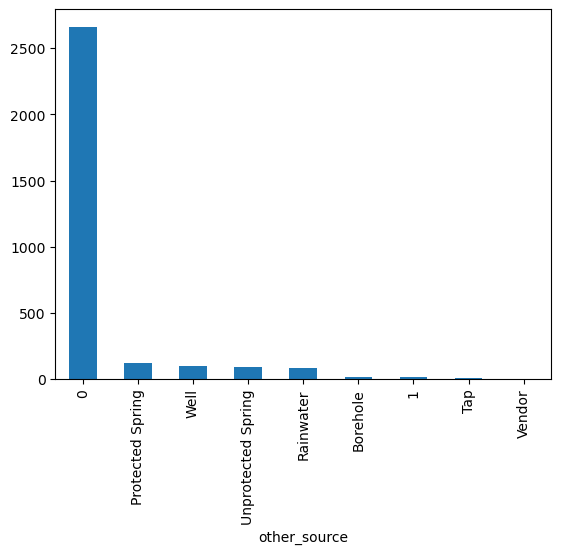

In [41]:
gvars.loc[gvars['other_source'].ne(0), 'other_source'].value_counts().plot(kind='bar')